# INFS 768
## Assignment 4
#### SVM
##### Kevin Kuipers
##### 12/13/2019

## Part 1. Explore Kernelized SVMs

##### Part 1. Low-dimensional data can be troubling for find separable spaces. Therefore this part will focus on using kernalized methods to make linear model more flexible by  applying interactions, polynomials, and adding more features to the input variables. Lets look at a artifical example below:

In [1]:

#Importing the libraries and data sets
from graphviz import *
import sklearn
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import matplotlib.pyplot as plt
import mglearn


from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

#Creating the synthetic data
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

#Displaying the data
mglearn.discrete_scatter(X[:, 0],X[:,1], y)
plt.xlabel("Variable 0")
plt.ylabel("Variable 1")

C:\Users\Agent000\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Agent000\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, 'Variable 1')

##### A linear model for classifying the above data shown in the scatterplot can only use a line. Lets look at building a linear SVM for this and see how it performs visually

C:\Users\Agent000\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Variable1')

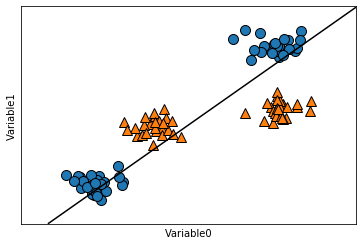

In [2]:
#Fitting the model
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

#Visualizing the model
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('Variable0')
plt.ylabel('Variable1')

##### Looking at these input variables in a two-dimensional space it not linearly separable. Lets try representing the data in three-dimensional space but taking second variable and squaring. This will create a 3 feature. The scatterplot below will help provide a visualization:

Text(0.5, 0, 'Variable1 ** 2')

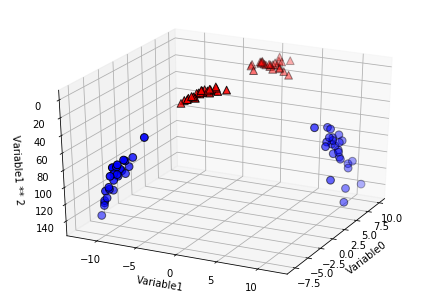

In [3]:
X_new = np.hstack([X, X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask,2], c='r', marker='^',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("Variable0")
ax.set_ylabel('Variable1')
ax.set_zlabel('Variable1 ** 2')

##### Adding this variable and looking at the data this way, it is not possible to use a hyper plane to "linearly" separate the data. This will allow the model to correctly classifiy the data points

C:\Users\Agent000\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'Variable1 ** 2')

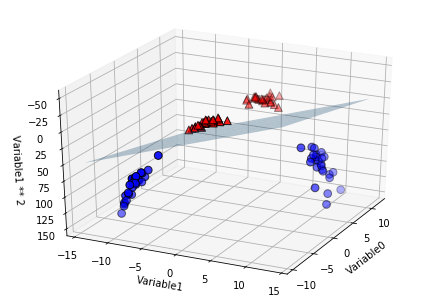

In [4]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

#Show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=9, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker='^',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('Variable0')
ax.set_ylabel('Variable1')
ax.set_zlabel('Variable1 ** 2')

##### As the graph shows the data is no longer linear but is higher in dimensionality. It went from two dimensional space to three dimensional space. This allows the plane to separate the data as clearly shown above. However, it is not a straight plane that separates. Lets look at 2 dimensional representation of how the decision boundary.

Text(0, 0.5, 'Variable1')

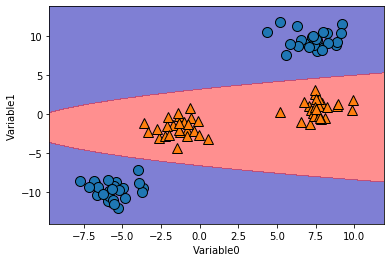

In [5]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
           cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('Variable0')
plt.ylabel('Variable1')

##### As the graph shows it appears to be more of elipse that shapes the decison boundary between the two classes.

##### Now lets look SVMs on a to dimensional data set. The black line will represent the decision boundary

Text(0, 0.5, 'Variable1')

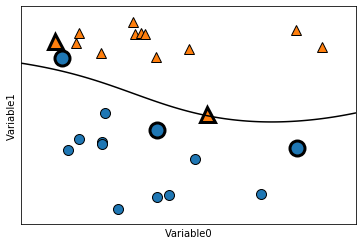

In [6]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

#plot the support vectors
sv = svm.support_vectors_
# Class labes of support vectors are given by the sign of the dual coefficients 
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15 ,markeredgewidth=3)
plt.xlabel("Variable0")
plt.ylabel("Variable1")



##### As the visual above displays, the decision boundary is non-linear, it is a smooth line. The graph also highlights the data points that are the support vectors used to decided the decision boundary. In this case two parameters were used the model to help form the decision boundary: C parameter and gamma parameter. In addition, the 'rbf' kernal was used in this model. Now lets look at fine tuning and playing around with these parameters

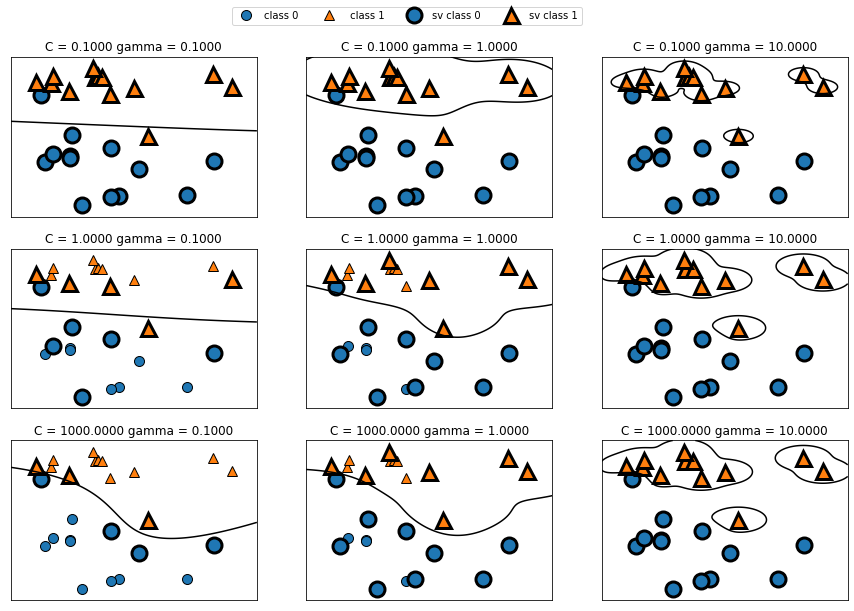

In [7]:
fig, axes = plt.subplots(3,3, figsize=(15,10))
for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
    axes[0,0].legend(['class 0',' class 1', 'sv class 0', 'sv class 1'],
                    ncol=4, loc=(.9, 1.2))    
    

##### Each graph has an adjusted C parameter or gamma parameter. The C parameter increases from top to bottom. The gamma parameter increases from left to right. The C parameter affect the models restriction, where each data point has influence on the decision boundary. So a small C parameter uses more data points for the support vectors which in turn creates a more linear line. This also means that misclassified points do not have much influence on the line. The larger the C parameter the less data points are used for the support vectors which in turn have stronger influence over the decision boundary. This allows the decision boundary to bend and curve to better separate the data in this case.

##### The gamma parameter is changed from left to right. The gamma parameter in the Gaussian kernel, means many data  points are considered for the model. This in turn, creates a large radius for the Gaussian kernel. Therefore, te smaller the gamma parameter tends to create simpler models. When the gamma parameter increases, the model tends to be more complex. 

## Part 2. Build an SVM model to classify the Breast Cancer Data

##### Now lets turn our attention to the breast cancer data set. This data set has been explored previously using NNET and decision tree models. Lets try developing a SVM model and see how it performs

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("The accuracy on the training set: {:.2f}".format(svc.score(X_train,y_train)))
print("The accuracy on the testing set: {:.2f}".format(svc.score(X_test, y_test)))

The accuracy on the training set: 1.00
The accuracy on the testing set: 0.63


C:\Users\Agent000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


##### It appears the SVM performs well on the training set with 100% accuracy. However, the testing set accuracy is only 63%. This can be a sign of over fitting the model. This means the model is not generalizing well for when new data comes in. Lets try adjusting the parameters to see if a better test accuracy score will result. Similar to the neural network model, SVMs perform better when the data of the features are scaled. Lets take a look with a boxplot of the features for the their minimum and maximum values. 

Text(0, 0.5, 'Feature magnitude')

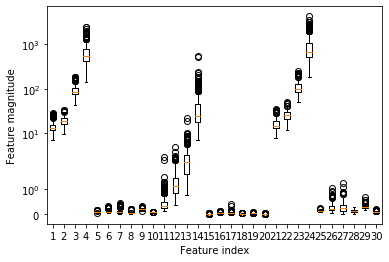

In [9]:
plt.boxplot(X_train)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

##### The features seem to very alot. One way around this variance is to scale data. Lets try scaling the data and then running a SVM model to see if performance improves

In [10]:
#Compute the minimum vale per feature on the training set

min_on_training = X_train.min(axis=0)

#compute the range of each feature (max - min)

range_on_training = (X_train - min_on_training).max(axis=0)

#subtract the min, and divide the range
#afterward, min=0 and max = 1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training

print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n{}".format(X_train_scaled.max(axis=0)))


Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [11]:
#Using the same transformation on the test set
#using min and range of the training set
X_test_scaled = (X_test - min_on_training) / range_on_training

In [12]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on the training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on the test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on the training set: 0.948
Accuracy on the test set: 0.951


C:\Users\Agent000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


##### Scaling the data made  huge improvment on the model. The testing accuracy is now 95% and the training is 94.8%. This suggest that the model is performing well and not overfitting the data. Now we can fine tuning some of the parameters.

In [13]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on the training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on the test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on the training set: 0.988
Accuracy on the test set: 0.972


C:\Users\Agent000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


##### Adjusting the C-parameter to 1000 inceased the accuracy on both the training and testing set. The model even performs better and fits the data better. Lets use GridSearchCV in order to fine tune the SVM and its parameters to find which ones perform best.

In [24]:
from sklearn.model_selection import GridSearchCV

from sklearn import svm
parameter_space = {'kernel':['rbf'], 
              'C':[0.000001, 0.1, 1, 2, 3, 4, 5, 10, 50, 100, 75, 1000, 5000],
             'gamma':[0, 0,0.000001, 0.1, 0.25, 0.40, 0.5, 0.6, 0.75, 1, 5, 10, 100, 1000]
            }
svc = svm.SVC()
clf = GridSearchCV(svc, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train_scaled, y_train)
print('Best Paramaters are:\n', clf.best_params_)
print('Best accuarcy are:\n', clf.best_score_)

Best Paramaters are:
 {'C': 3, 'gamma': 0.5, 'kernel': 'rbf'}
Best accuarcy are:
 0.9835680751173709


##### It appears the best parameters are C=3 and gamma = 0.5. Lets try fitting the model with these parameters. 

In [27]:
svc = SVC(C=3, gamma=0.5)
svc.fit(X_train_scaled, y_train)

print("Accuracy on the training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on the test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on the training set: 0.986
Accuracy on the test set: 0.972


##### Even after fine tuning these parameters, it appears accuracy of the model is the same as when C=1000. 